In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
import cluster
import super_sort as ssort
from generate_test_data import generate_nested_data

In [8]:
def add_cuts(ax, cuts, N):
    cuts.append(N)
    print(len(cuts))
    c_last = 0
    for c in cuts:
        color = 'k'
        ax.plot([c, c], [c, c_last], color)
        ax.plot([c, c_last], [c, c], color)
        ax.plot([c, c_last], [c_last, c_last], color)
        ax.plot([c_last, c_last], [c, c_last], color)
        c_last = c
    

def mplot(a, title=None, boxes=None):
    cmap = 'spectral'
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pcolor(a, vmin=0.1, vmax=0.8, cmap=cmap)
    N = len(a)
    if boxes is not None:
        add_cuts(ax, cuts=boxes, N=N)
    ax.set_xlim([0, N])
    ax.set_ylim([0, N])
    if title is not None:
        ax.set_title(title, size=20)
    plt.show()

# Generate Test Data

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


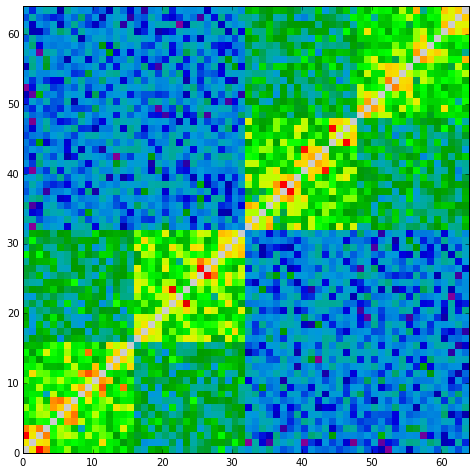

In [9]:
test_solution = generate_nested_data() #noise=None)
mplot(test_solution)

# Shuffle Matrix Order

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


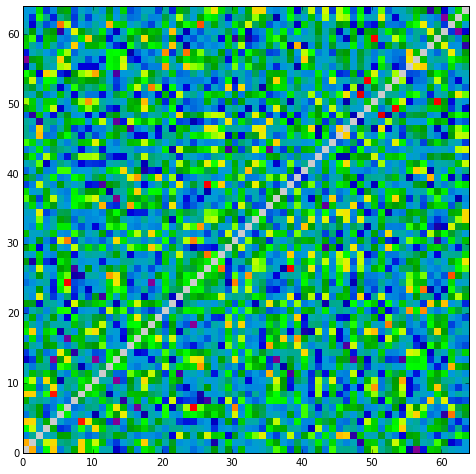

In [10]:
n = len(test_solution)
order = np.arange(n)
random.shuffle(order)
test = test_solution[:, order][order, :]

mplot(test)

# Run Reorder

In [11]:
# temperature
# fraction moved
# best fitness
# 1000 * last move ... (?)
# evals - last move
# steps * finishing criterion

In [12]:
# reorder using simulated annealing
sas = ssort.SASort(test)
ds_result, ds_order = sas()

#reorder using heirarchical clustering
hcs = ssort.HierarchicalClustering(test)
hc_result, hc_order = hcs()

0.001 0.7788461538461539 1078.08071305 779.0 0 104
0.000904792147113709 0.7115384615384616 1081.86218494 712.0 0 104
0.0008186488294786356 0.6730769230769231 1088.15871776 674.0 0 104
0.0007407070321560992 0.5865384615384616 1095.49890071 587.0 1 104
0.0006701859060067401 0.5961538461538461 1099.223757 597.0 0 104
0.0006063789448611847 0.5769230769230769 1112.23731928 577.0 0 104
0.0005486469074854967 0.5288461538461539 1119.84424218 529.0 0 104
0.0004964114134310989 0.46153846153846156 1120.95078466 462.0 2 104
0.000449149148610075 0.5288461538461539 1122.96658294 529.0 1 104
0.0004063866225452041 0.5480769230769231 1124.24558317 549.0 1 104
0.0003676954247709636 0.5 1124.24558317 500.0 4 104
0.0003326879328624074 0.49038461538461536 1125.74991319 491.0 0 104
0.00030101342909339904 0.41346153846153844 1127.46690398 414.0 0 104
0.0002723545868194767 0.46153846153846156 1127.46690398 462.0 1 104
0.0002464242913846614 0.40384615384615385 1127.73164258 404.0 0 104
0.00022296276370290202 0

In [13]:
print('result = reordered array')
print(type(ds_result))
print(ds_result.shape)

print()

print('order = new order of array in terms of initial indicies')
print(type(ds_order))
print(ds_order)

result = reordered array
<class 'numpy.ndarray'>
(64, 64)

order = new order of array in terms of initial indicies
<class 'numpy.ndarray'>
[43 62 22 48 51 38 33 63 27 46 41 28 26 45 34  2 24 13  6 30 23 20 57 55 25
 32 61  5 12 40 14 56  3 42 10  1 44  0  8 54  4  9 50 17 59 53 49 36 29 15
 35 11 18 31 52 16 19 39 37 21 47 58 60  7]


In [14]:
# mplot(ds_result, title='Deep Sort')

# mplot(hc_result, title='heirarchical cluster')

# mplot(test_solution, title='test solution')

11


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


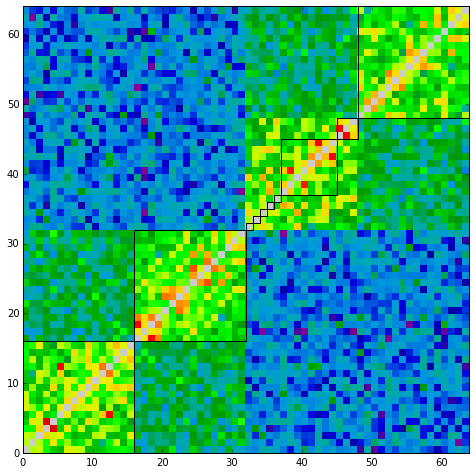

In [16]:
bc = cluster.BoxClustering(ds_result)
best_boxes, best_boxes_fitness = bc.fit_boxes(ds_result)
mplot(ds_result, boxes=best_boxes)
plt.show()

In [17]:
import cluster_old as co
import pandas as pd
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


5


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


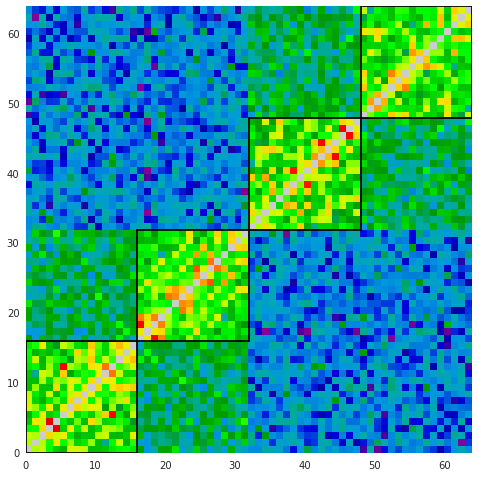

In [18]:
old_results = []
for i in range(10):
    bc = co.BoxClustering(ds_result)
    best_boxes, best_boxes_fitness = bc.fit_boxes()
    old_results.append(best_boxes.fitness)
mplot(ds_result, boxes=best_boxes)

5


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


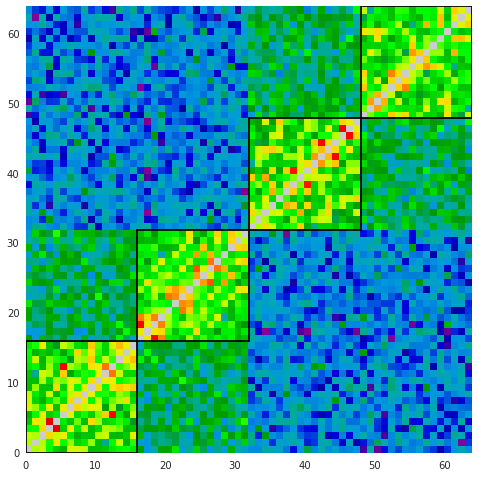

In [20]:
new_results = []
for i in range(10):
    bc = cluster.BoxClustering(ds_result)
    best_boxes, best_boxes_fitness = bc.fit_boxes()
    new_results.append(best_boxes_fitness)
mplot(ds_result, boxes=best_boxes)

In [21]:
print('new mean: {m}, std:{s}'.format(m=np.mean(new_results), s=np.std(new_results)))
print('old mean: {m}, std:{s}'.format(m=np.mean(old_results), s=np.std(old_results)))

new mean: 32.15356247417789, std:7.105427357601002e-15
old mean: 32.15356247417789, std:7.105427357601002e-15


# Test Box Clustering Convergence

In [23]:
bc = cluster.BoxClustering(test_solution)
df = bc.debug(matrix=test_solution)
df.head()

,t_since_last_move,move_accepted,p,temp,current_fit,new_fit,best_fit,current_len,new_len,best_len
evals,,,,,,,,,,
4,4,False,0.580093,0.009,45.427145,45.649788,45.427145,64,63,64
5,5,False,0.662538,0.009,45.427145,45.595457,45.427145,64,63,64
6,6,False,0.360408,0.009,45.427145,45.844378,45.427145,64,63,64
7,0,True,1.093221,0.009,45.390706,45.390706,45.390706,63,63,63
9,3,True,0.845463,0.009,45.459284,45.459284,45.390706,62,62,63


1131 1131


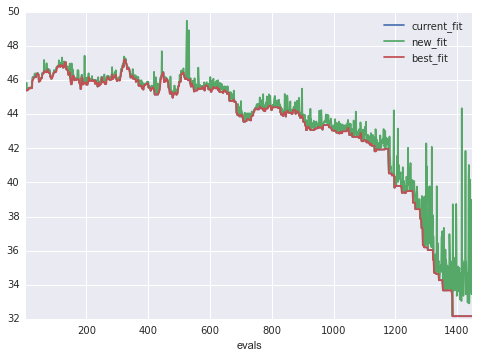

In [24]:
d = df #[df['p']] #==False]
print(len(df), len(d))
d[['current_fit','new_fit', 'best_fit']].plot()
plt.show()